September 6, 2020
1. app data need to be divided into major sectors
    This is because after reading literature, you find different sectors follow different patterns and no previous paper write
    an entire paper on all-encompassing internet economy.

You could consider bringing in other data.

In [2]:
# import packages and define path
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from google_play_scraper import app
from tqdm import tqdm
input_path = Path("/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/____WEB_SCRAPER____")
output_path = Path("/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/____WEB_SCRAPER____/___cleaned_datasets___")
# run python scripts containing all the functions
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

In [4]:
# open an old dataset for tracking
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202009" / "TRACKING_202002.pickle"
with open(q, 'rb') as filename:
    C = pickle.load(filename)

# get the unique id list from the old data
id_list = get_id_from_data_beofre_202009(C)
print(id_list)

TypeError: string indices must be integers

In [17]:
# scraping app details according to id
app_details = scraping_apps_according_to_id(id_list)
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202009" / "TRACKING_202002.pickle"
pickle.dump(app_details, open(q,'wb'))

scraping...: 100%|██████████| 6860/6860 [3:05:01<00:00,  1.62s/it]      


In [6]:
# load all the data scraped before 202009 and convert them to dictionaries with appid as keys
# and save them into __PANELS__ folder (subfolders are named according to the initial month the panel is scraped)
# the original scraped data are stored in "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" (subfolders are named according to the month
# the data is scraped).
### First convert all the initial panels into appid as key and as dataframe
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

for i in ["201812", '201907', '201908', '201912', '202001', '202002']:
    filename = 'ALL_APP_DETAILS_' + i + '.pickle'
    q = input_path / "NEW_ALGORITHM_MONTHLY_SCRAPE" / i / filename
    with open(q, 'rb') as f:
        C = pickle.load(f)
    D = convert_list_data_to_dict_with_appid_keys(C)
    E = transform_old_scraper_dict_dataframe(D, i)
    filename = 'INITIAL_' + i + '.pickle'
    folder_name = i + '_PANEL_DF'
    q = input_path / "__PANELS__" / folder_name / filename
    pickle.dump(E, open(q,'wb'))

In [16]:
### second convert all the tracking datasets before 202009 into dataframe
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

# key represents initial panel, value represents panels tracking the initial panel
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009'],
'201908':['201912', '202001', '202003', '202004', '202009'],
'201912':['202001', '202003', '202004', '202009'],
'202001':['202003', '202004', '202009'],
'202002':['202004', '202009']}

for i, months in panels_track.items():
    for j in months:
        # because since 202003 I started using the new scraper
        if j not in ['202003', '202004', '202009']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            D = convert_list_data_to_dict_with_appid_keys(C)
            E = transform_old_scraper_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))
        elif j in ['202003', '202004']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            D = convert_list_data_to_dict_with_appid_keys(C)
            E = transform_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))
        # because since 202009 I started using appid as key in scraping stage, so I do not need to convert from list to dictionary first
        elif j in ['202009']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            E = transform_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))

after dropping rows all NA in all columns, the non-missing values in each column  title_202003              4809
description_202003        4809
descriptionHTML_202003    4809
summary_202003            4809
summaryHTML_202003        4809
                          ... 
score_1_202003            4350
score_2_202003            4350
score_3_202003            4350
score_4_202003            4350
score_5_202003            4350
Length: 61, dtype: int64
title_202003               string
description_202003         string
descriptionHTML_202003     string
summary_202003             string
summaryHTML_202003         string
                           ...   
score_1_202003            float64
score_2_202003            float64
score_3_202003            float64
score_4_202003            float64
score_5_202003            float64
Length: 61, dtype: object
after dropping rows all NA in all columns, the non-missing values in each column  title_202004              4769
description_202004        4769
descript

In [ ]:
### TEST CELL
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

D = transform_dict_dataframe(C, '202009_track_202002')
#D.check_all_genre_covered.unique()
#F = D[D.check_all_genre_covered == 2]
#F.genreId.unique()
#F.count()

In [12]:
### TEST CELL
#get a glimpse of the scraped raw data
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202003" / "TRACKING_201812.pickle"
with open(q, 'rb') as filename:
    C = pickle.load(filename)

random_number = np.random.randint(len(C), size=1)[0]
for k, v in C[random_number].items():
    print(k, " : ", v)
#get_a_glimpse(C)



title  :  Gravidez ao Vivo LITE
description  :  Versão gratuita do aplicativo "Gravidez ao Vivo"

Um aplicativo criado por um grupo de médicos formado por pediatras, obstetras e radiologistas. Sua base de dados é totalmente fundamentada na literatura médica e curvas de crescimento.

Seus dados são tão corretos que você tem a impressão de que o aplicativo está realmente fazendo as medidas do seu bebê a cada segundo.

DIFERENCIAL
As diversas curvas de crescimento foram transformadas em equações através do método de Newton (interpolação polinomial). Baseado neste equações, o aplicativo refaz os cálculos e você pode acompanhar o crescimento do seu bebê a cada segundo.

RECURSOS
- Possui informações sobre todas as semanas de sua gestação.
- Disponível um banco de dados que refaz os cálculos de crescimento a cada clique. 
- Acompanhe o desenvolvimento individual de cada um dos 5 sentidos do seu bebê.
- Obtenha dicas e curiosidades sobre cada semana de gestação.
- Verifique o peso do seu bebê

KeyError: 'minInstalls'

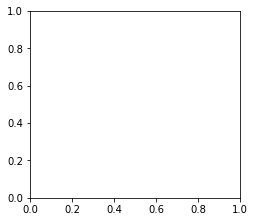

In [7]:
# TAKE A LOOK AT DATAFRAMEs



In [ ]:
# Merge PANELS into a SINGLE DATAFRAME

